# GRIP @ The Sparks Foundation
# Name: Eriny Adel Badr Louis
# Batch: JUNE 2022

# TASK-1 Predection using Supervised ML
####  (Level - Beginner)

*   Predict the percentage of an student based on the no. of study hours.
*   What will be predicted score if a student studies for 9.25 hrs/day.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error

### Read and plot our data

In [2]:
data = pd.read_csv('student_scores - student_scores.csv')
#OR
#data = pd.read_csv('http://bit.ly/w-data')

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


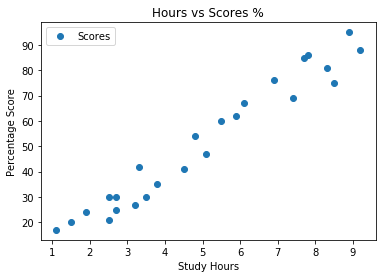

In [3]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores %')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

### Preprocessing the data

Checking null values

In [4]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
X = data.copy()
y = X.pop('Hours')

X.shape, y.shape

((25, 1), (25,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building the model

In [7]:
linearRegModel = LinearRegression().fit(X_train, y_train)

Plotting the regression line (Best fit line)

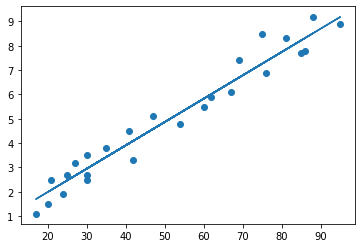

In [8]:
line = linearRegModel.coef_* X + linearRegModel.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [9]:
y_pred = linearRegModel.predict(X_test)

Comparing Actual vs Predicted

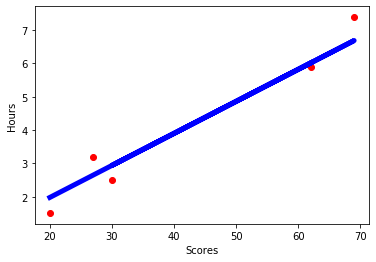

In [10]:
plt.xlabel('Scores')
plt.ylabel('Hours')

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, linewidth=5.0, color='blue')

plt.show()

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_sorted = df.sort_values(by = ["Actual", 'Predicted'])
df_sorted

,Actual,Predicted
5,1.5,1.980361
16,2.5,2.940491
2,3.2,2.652452
11,5.9,6.012904
19,7.4,6.684994


The percentage of a student who study 9.25 hours

In [12]:
hours = np.array(9.25)
own_pred = linearRegModel.predict(hours.reshape(-1, 1))
print(f"No of Hours: {hours}, Predicted Score: {own_pred[0]}")

No of Hours: 9.25, Predicted Score: 0.9482224548116611


### Evaluating the model

In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('\nTraining Accuracy  :', linearRegModel.score(X_train, y_train))
print('Testing  Accuracy  :', linearRegModel.score(X_test, y_test))

Mean Absolute Error: 0.45926193360224854

Training Accuracy  : 0.9515510725211552
Testing  Accuracy  : 0.9485338729825948
